In [5]:
import pandas
import pickle
import itertools
import re
from pg import DB
db = DB()

In [39]:
motifNames_avg_scores = db.query("SELECT average_score FROM motifs where average_score != 'NaN'").getresult()


In [3]:
motifNames_avg_scores

[(0.0274411187471304,),
 (0.0130064430754976,),
 (0.0194823093197801,),
 (0.0241899562971916,),
 (0.000848575983627284,),
 (0.00729545993460078,),
 (0.0137844715657462,),
 (0.00817810091747174,),
 (0.0117147505447178,),
 (0.0169872386706168,),
 (0.00973017917380161,),
 (0.0132261841784508,),
 (0.0169040429303356,),
 (0.0150832260631206,),
 (0.00673713169493449,),
 (0.0009154068780321,),
 (0.000673876800151959,),
 (0.00776591634031773,),
 (0.00336228182989263,),
 (0.00142641187479836,),
 (0.00410833010777236,),
 (0.000258951729669211,),
 (0.00373837350523991,),
 (0.00697395513525302,),
 (0.0180071507229794,),
 (0.0012651642651362,),
 (0.000283412094948996,),
 (0.0010538993178385,),
 (0.00710361712870586,),
 (0.00897309688154056,),
 (0.00523076980033583,),
 (0.00123218705090105,),
 (0.0075644181283809,),
 (0.00084448255049943,),
 (0.000951235801132889,),
 (0.00494046992740836,),
 (0.0103010785390603,),
 (0.00567619698100223,),
 (0.00193672853626279,),
 (0.000513143049144048,),
 (0.009013

In [40]:
df = pandas.DataFrame(motifNames_avg_scores)

In [41]:
df.describe()

,0
count,14961.000000
mean,0.002396
std,0.002297
min,-0.000284
25%,0.000592
50%,0.002029
75%,0.003382
max,0.027441


In [13]:
(-df).describe()

,0
count,12481.000000
mean,-0.002451
std,0.002353
min,-0.027441
25%,-0.003469
50%,-0.002082
75%,-0.000607
max,0.000284


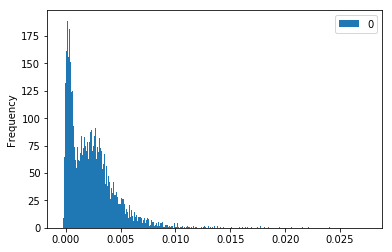

In [42]:
%matplotlib inline

import matplotlib
foo = df.plot(kind='hist', bins=1000)

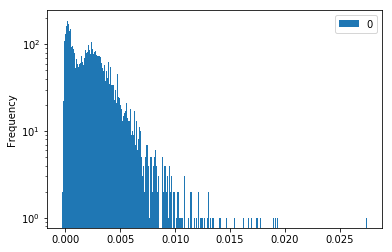

In [43]:
%matplotlib inline

import matplotlib
foo = df.plot(kind='hist', bins=1000,log=True)